In [1]:
import sys
sys.path.append("../")
import json
import numpy as np 

In [2]:

with open("../results/dic_results_final.json", "r") as f:
        dic_results = json.load( f)

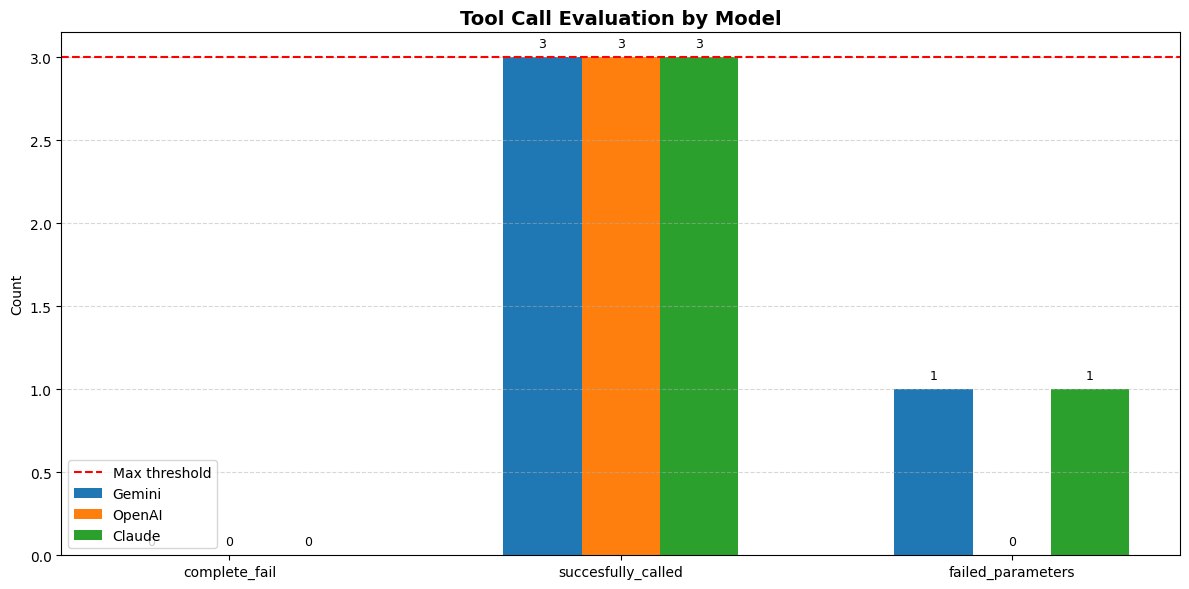

In [3]:
import matplotlib.pyplot as plt
import numpy as np


labels = ["complete_fail", "succesfully_called", "failed_parameters"]
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']  


y_max = max(len(dic_results[model]["calls"]) for model in dic_results)

for i, (model, color) in enumerate(zip(dic_results.keys(), colors)):
    values = [
        dic_results[model]["failed_calls"],
        np.sum(dic_results[model]["calls"]),
        len(dic_results[model]["params"]) - np.sum(dic_results[model]["params"])
    ]
    bars = ax.bar(x + i * width, values, width, label=model, color=color)

    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)


ax.set_xticks(x + width * (len(dic_results) - 1) / 2)
ax.set_xticklabels(labels)
ax.axhline(y=y_max, color='red', linestyle='--', linewidth=1.5, label="Max threshold")

ax.set_ylabel("Count")
ax.set_title("Tool Call Evaluation by Model", fontsize=14, fontweight='bold')
ax.grid(True, axis='y', linestyle='--', alpha=0.5)
ax.legend()

plt.tight_layout()
plt.show()


## Variable explanation
**succesfully_called** : The model calls the right function  - higher is better  
**failed_parameters**: The model calls the right function but with wrong parameters - lower is better  
**completed_fail** : The model fail to even call the functon - lower is better


## Analysis 
- Function call acurracy   
Gpt 4.0 **99.18%**    
Claude 3 haiku  **99.59%**    
Gemini-1.5 flash **88.82%** 

- Function call with right parameters acurracy   
Gpt 4.0 **87.9%**    
Claude 3 haiku  **87.3%**    
Gemini-1.5 flash **70%** 

Claude and Gpt4.0 around 10% better than Gemini-1.5-Flash 
Claude marginally beats Gpt4.0 and takes **10 minutes** vs **20 minutes** for GPT4.0 and **6minutes15** for Gemini 

## Prices 

| Model              | Input Tokens | Output Tokens | Context Window |
|--------------------|--------------|---------------|----------------|
| Gemini 1.5 Flash   | $0.075       | $0.30         | 1,000,000      |
| GPT-4o Mini        | $0.15        | $0.60         | 128,000        |
| Claude 3 Haiku     | $0.25        | $1.25         | 200,000        |

cf https://www.nebuly.com/blog/gpt-4o-mini-vs-claude-3-haiku-vs-gemini-1-5-flash?utm_source=chatgpt.com